In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Neural network\\gas_turbines.csv")
data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
data=data.iloc[:,[0,1,2,3,4,5,6,8,9,10,7]]
data

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX     TEY  
0      82.722  114.70  
1      82.776  114.72  
2      82.468  114.71  
3      82.670  114.72  
4      82.311  114.72  
...       ...     ...  
15034  79.559  111.61  
15035  79.917  111.78  
15036  90.912  110.19  
15037  93.227  110.74  
15038  92.498  111.58  

[15039 rows x 11 columns]

In [5]:
data.duplicated().sum()

0

In [6]:
col=data.columns

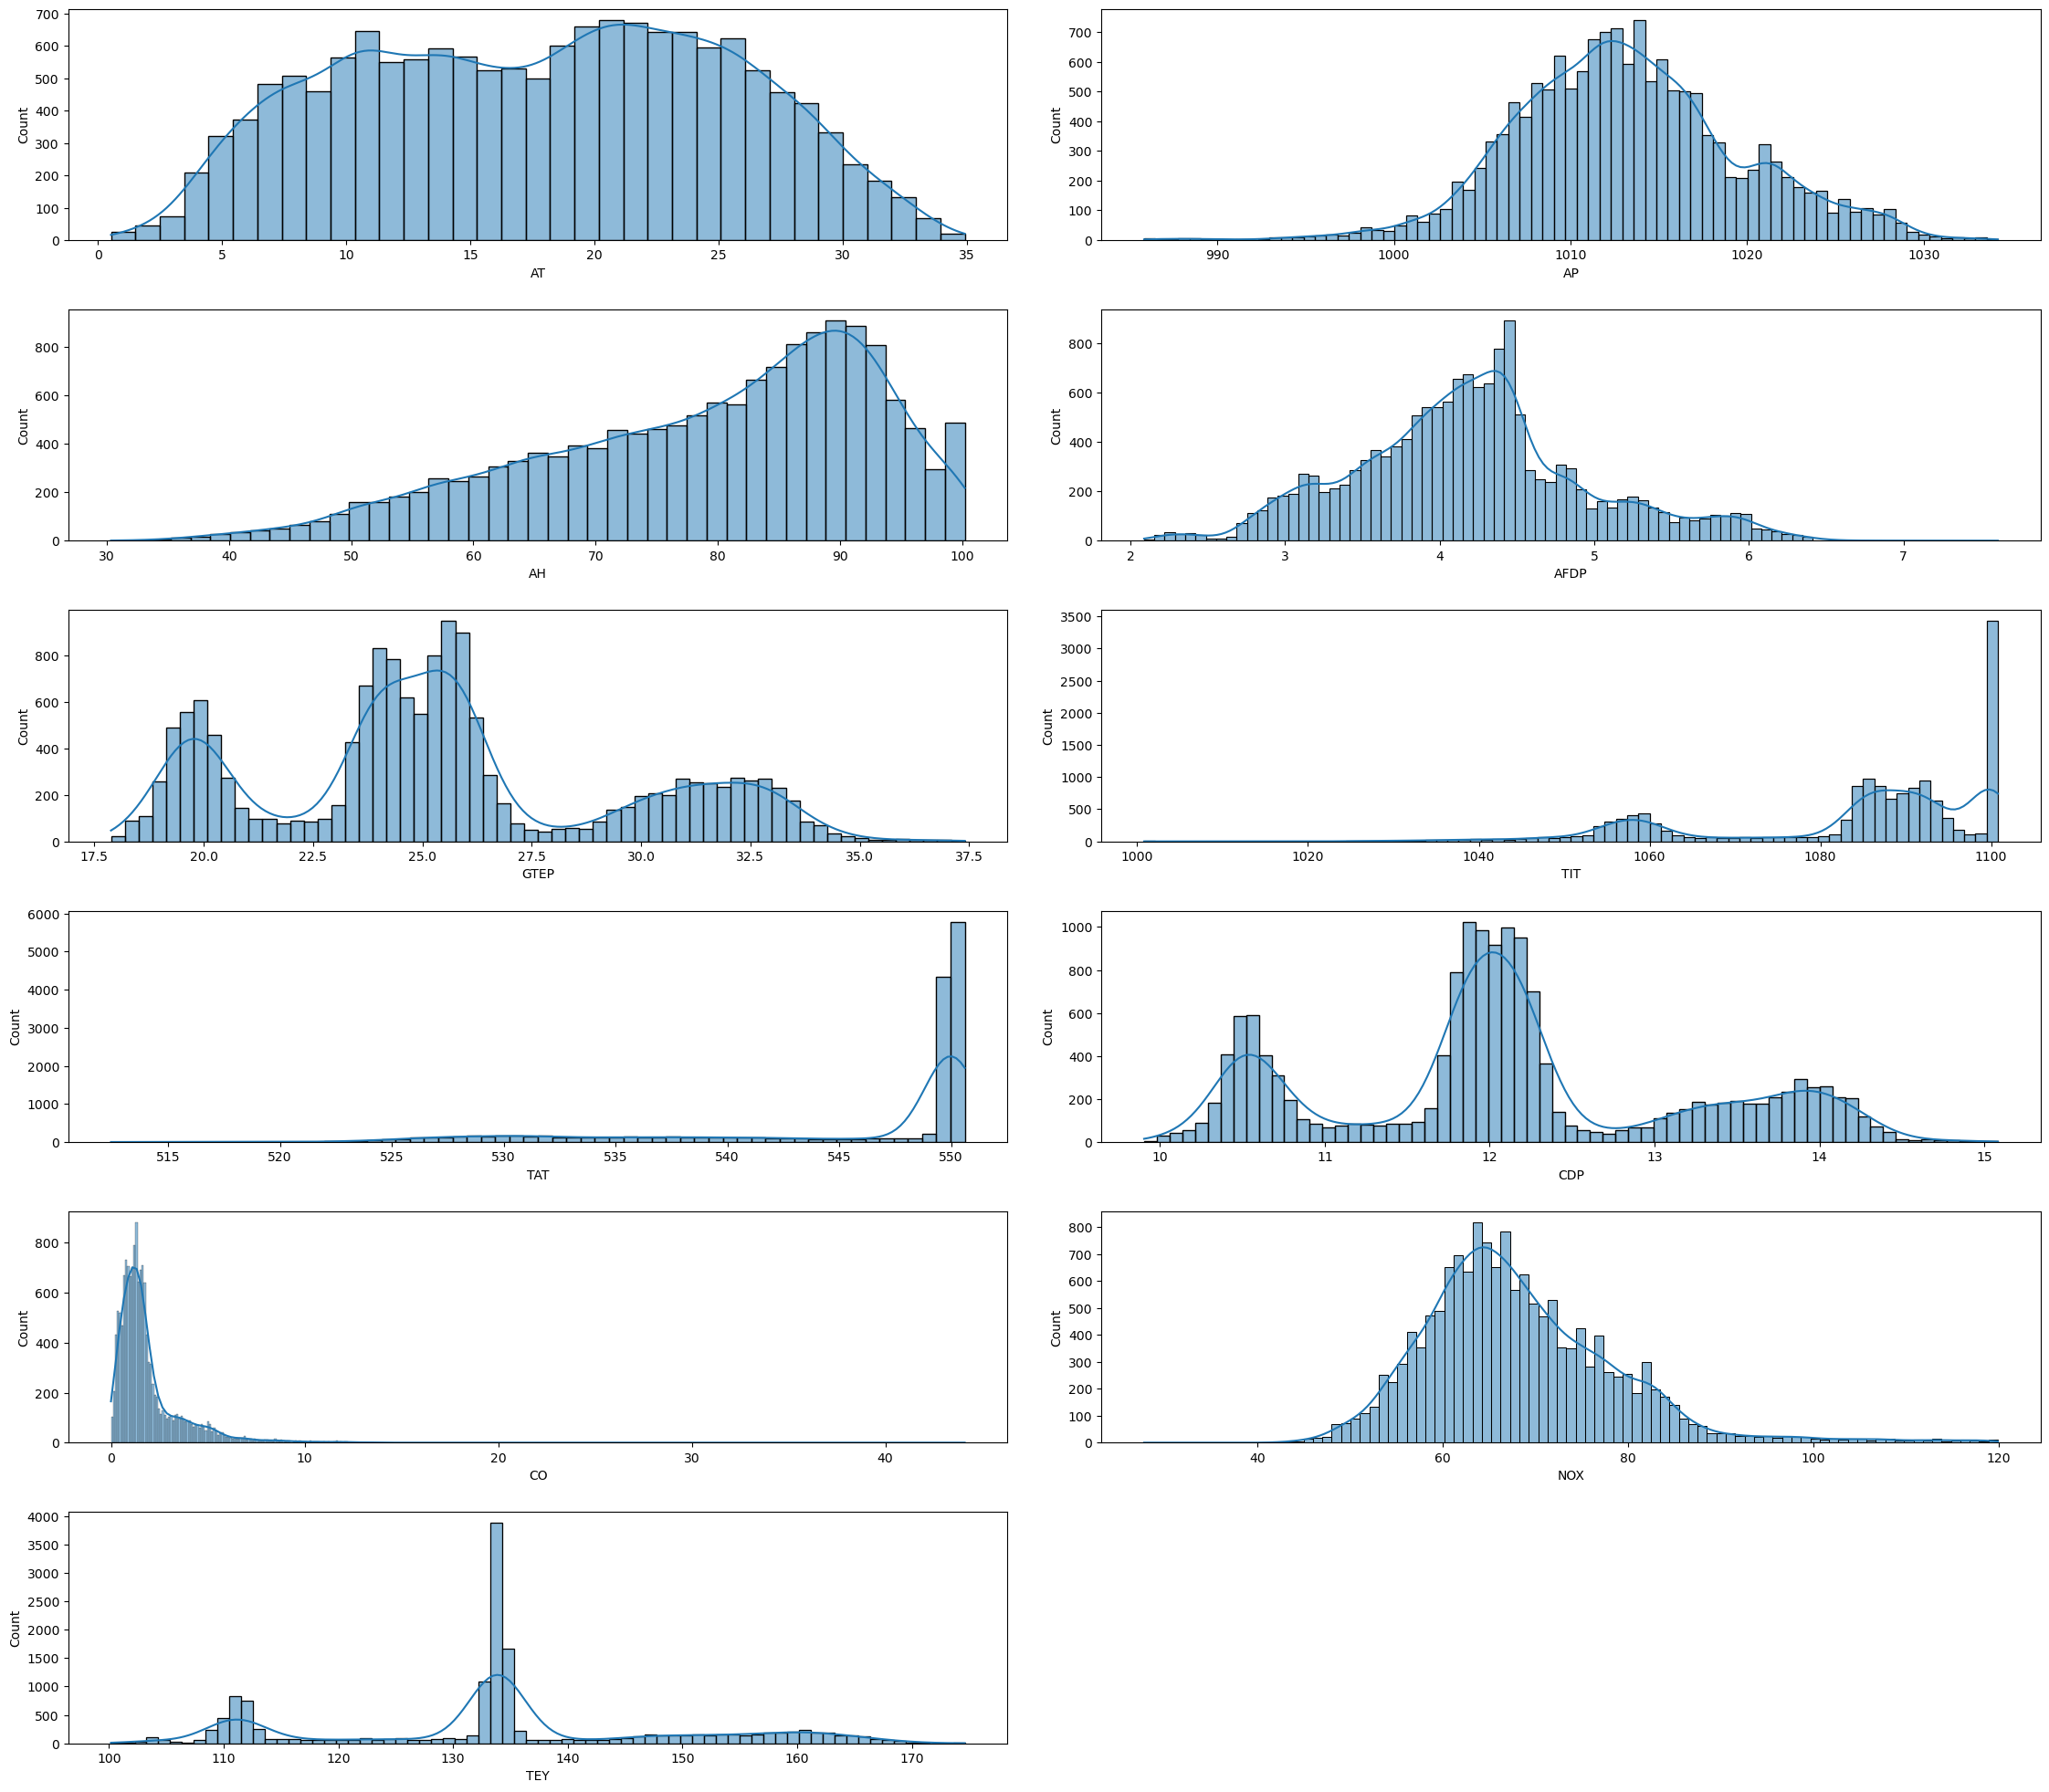

In [7]:
fig=plt.figure(figsize=(12,10))
count=1
for i in col:
    plt.subplots_adjust(left=0.2,bottom=0.1,right=2,top=2, wspace=0.1,hspace=0.3)
    plt.subplot(6,2,count)
    sns.histplot(data[i],kde=True)
    count+=1
plt.show()

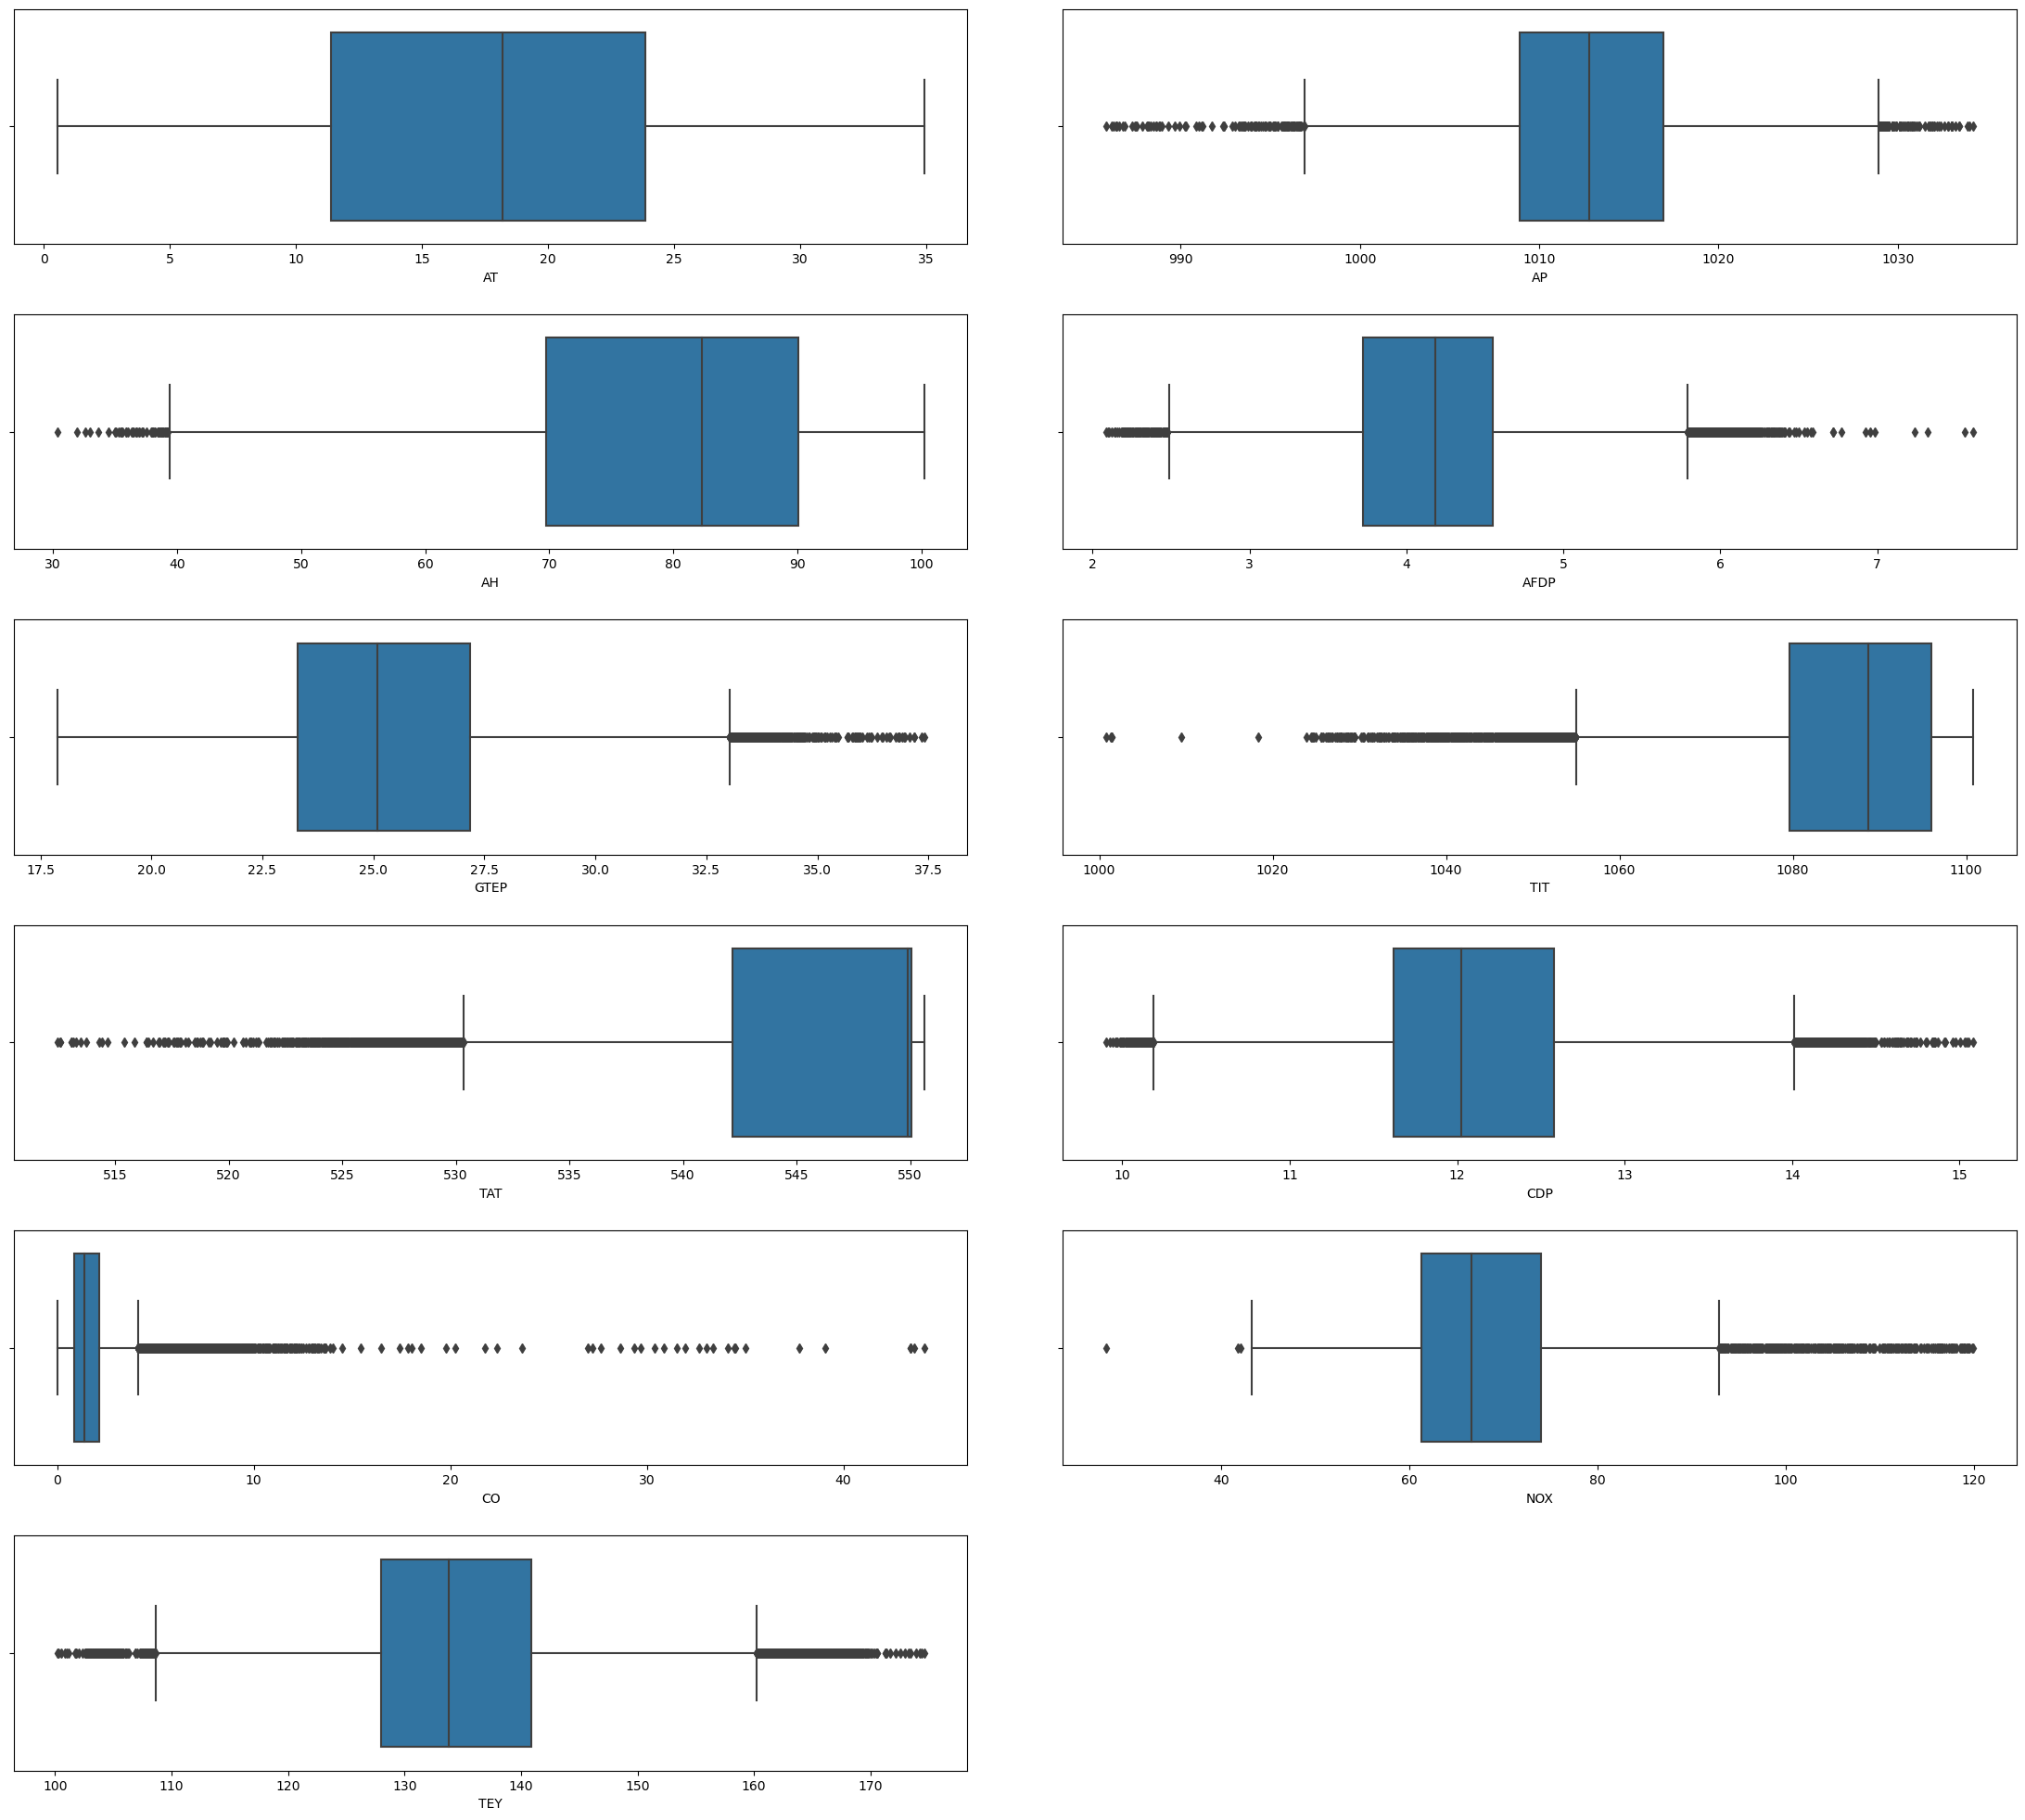

In [8]:
fig=plt.figure(figsize=(12,10))
count=1
for i in col:
    plt.subplots_adjust(left=0.2,bottom=0.1,right=2,top=2, wspace=0.1,hspace=0.3)
    plt.subplot(6,2,count)
    sns.boxplot(data[i])
    count+=1
plt.show()

# There are lot of outliers in features except AT feature

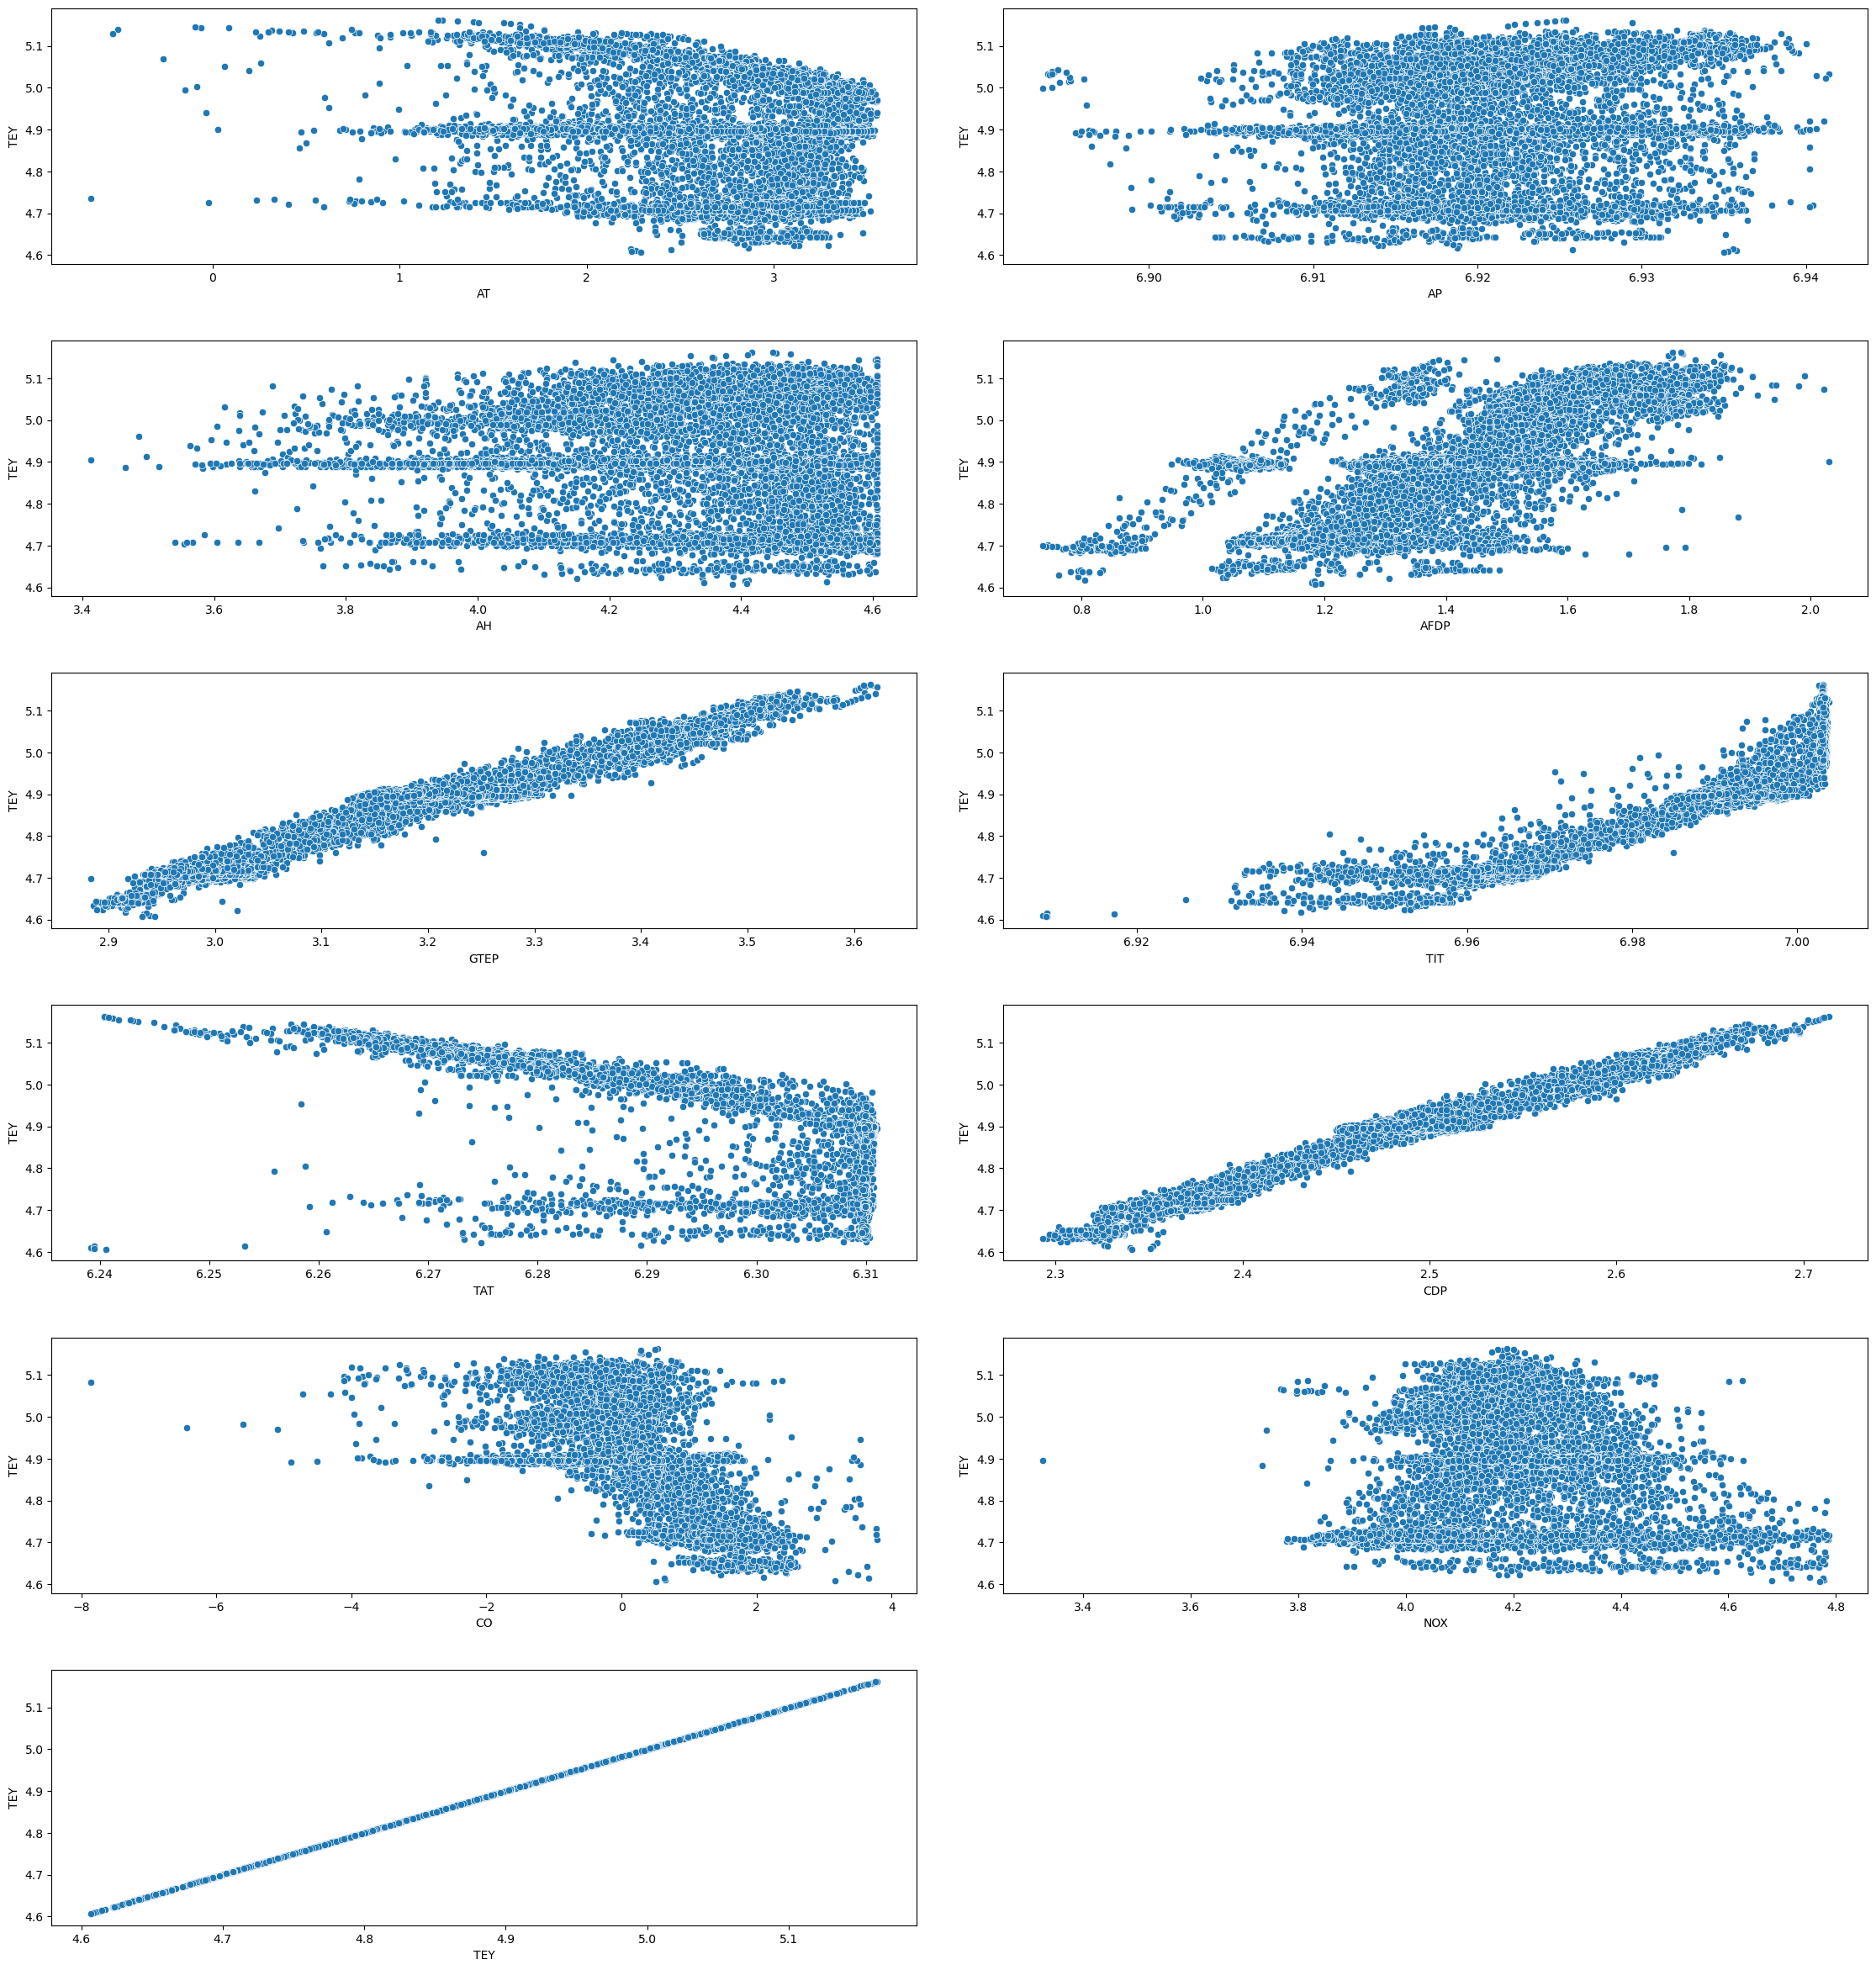

In [9]:
fig=plt.figure(figsize=(12,12))
count=1
for i in col:
    plt.subplots_adjust(left=0.2,bottom=0.1,right=2,top=2, wspace=0.1,hspace=0.3)
    plt.subplot(6,2,count)
    sns.scatterplot(np.log(data[i]),np.log(data['TEY']))
    count+=1
plt.show()

# Correlation analysis

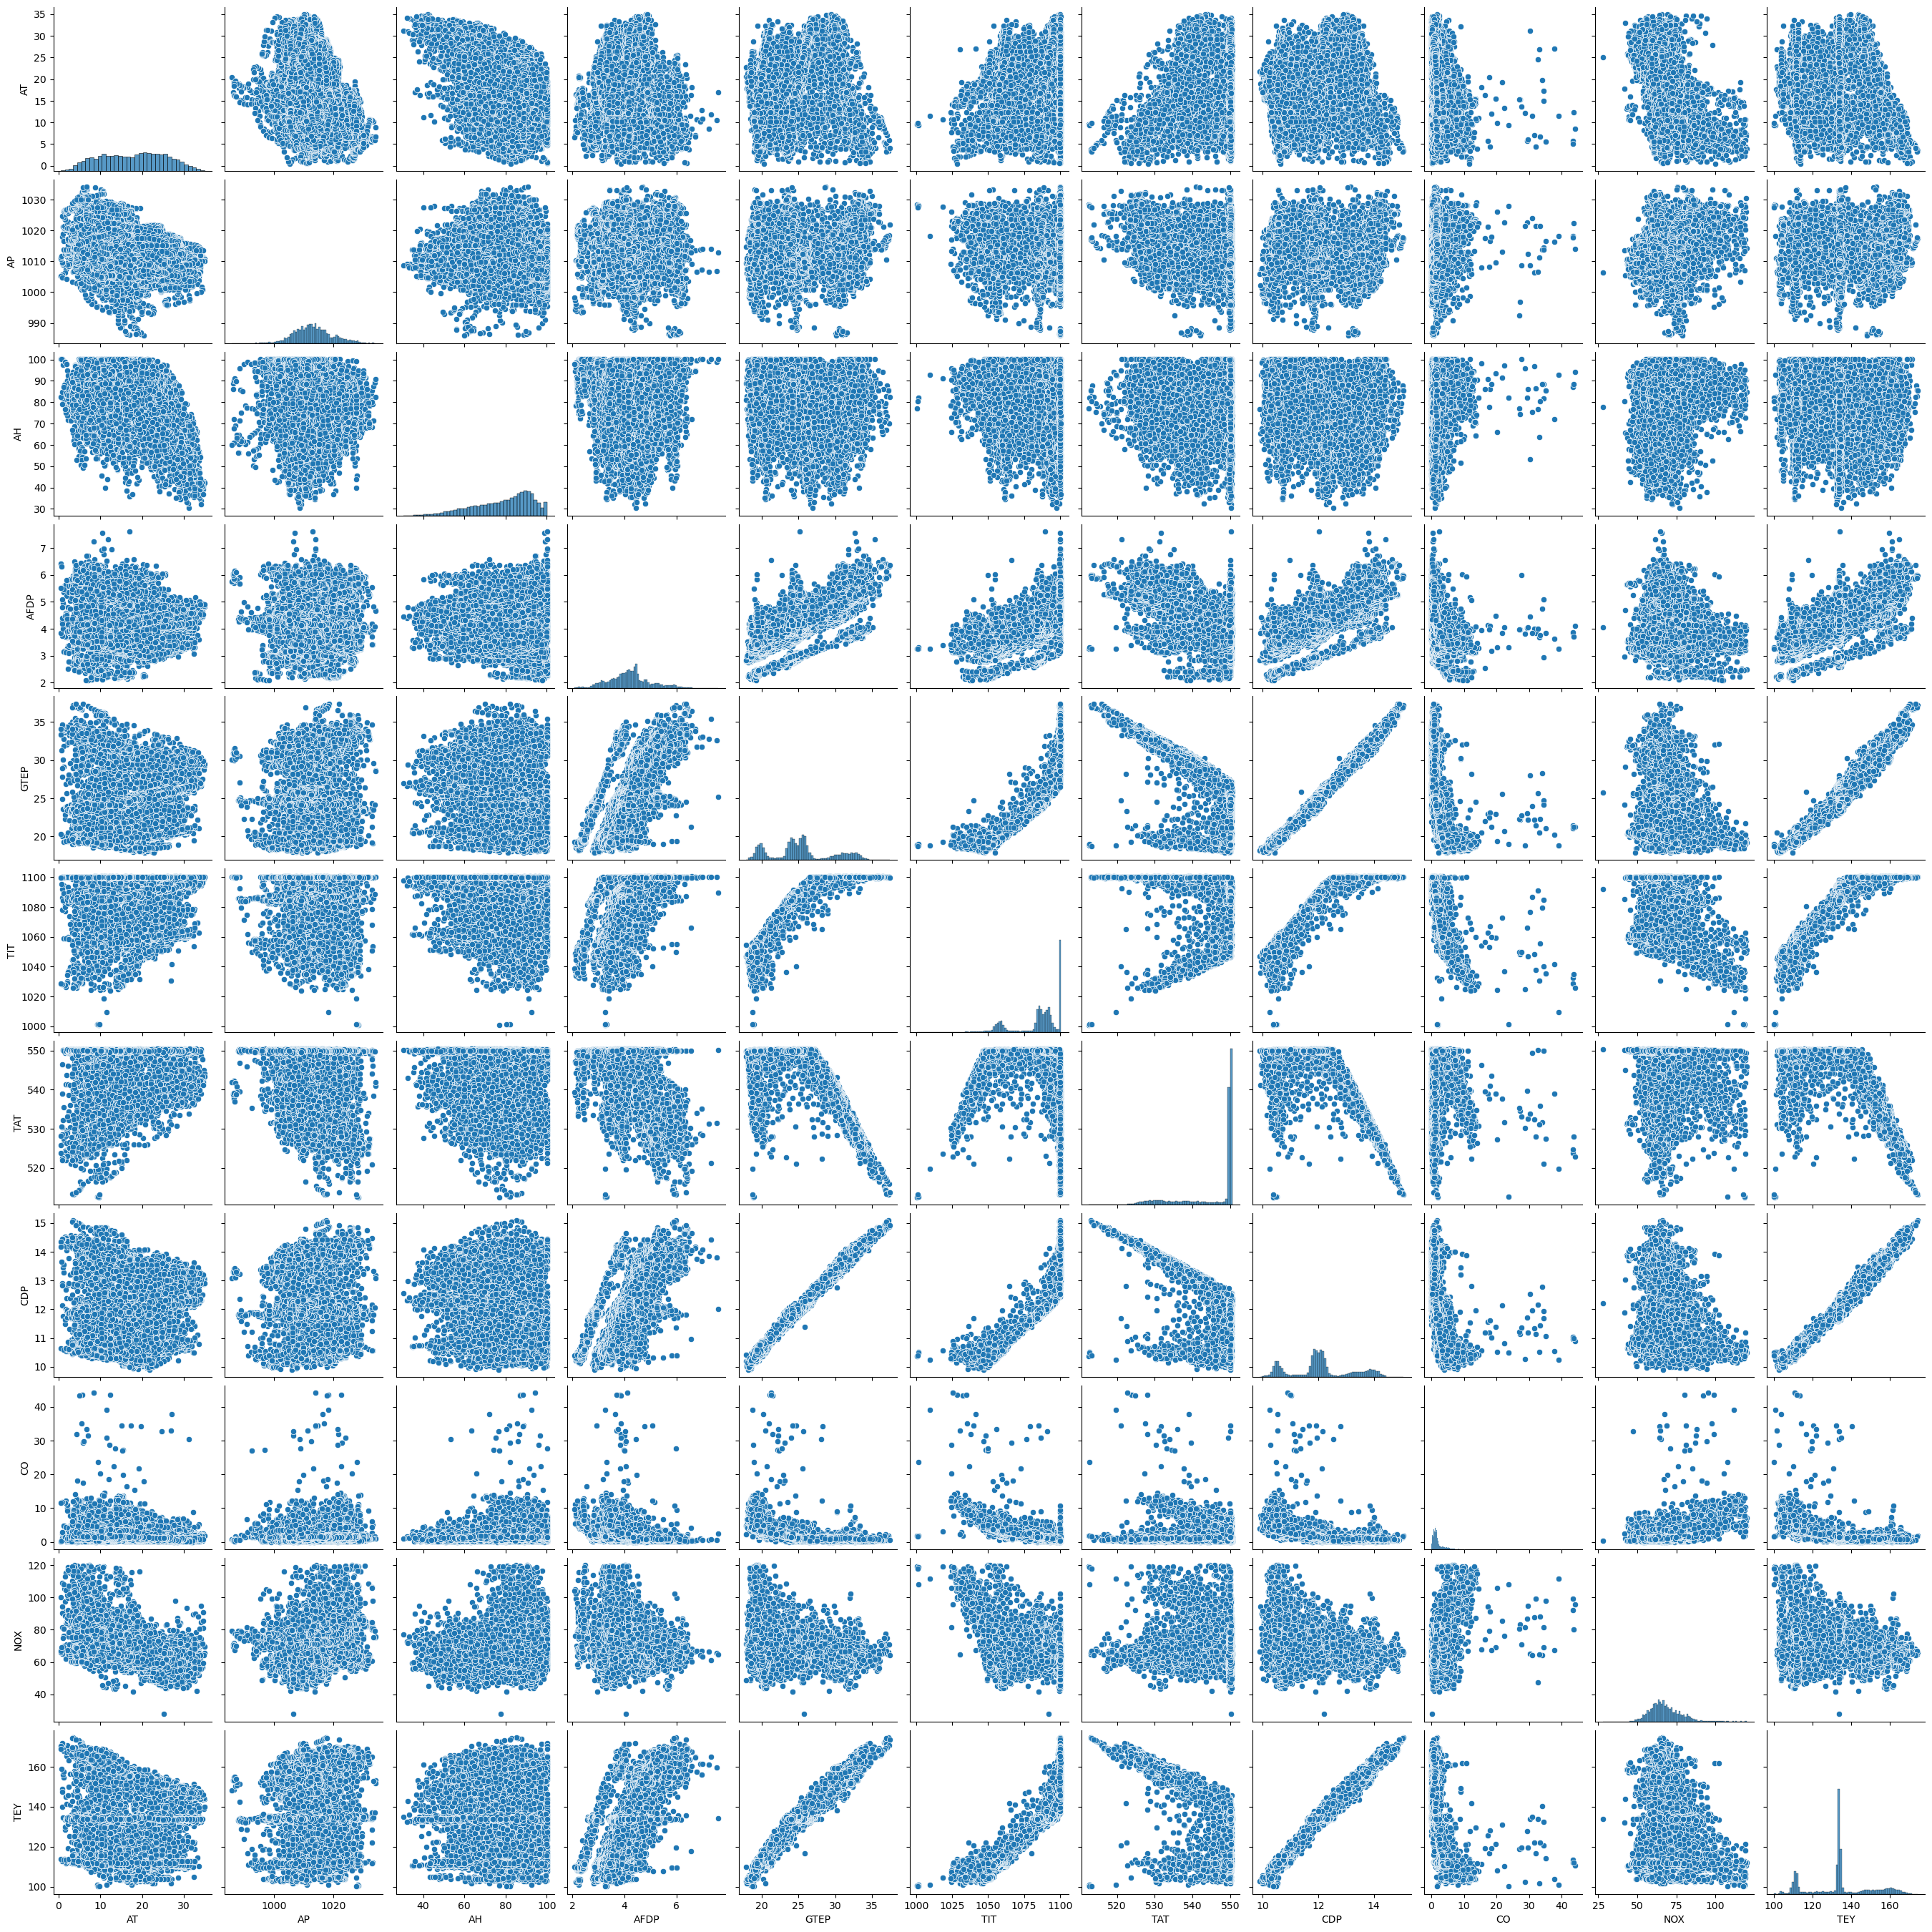

In [10]:
sns.pairplot(data)

<AxesSubplot:>

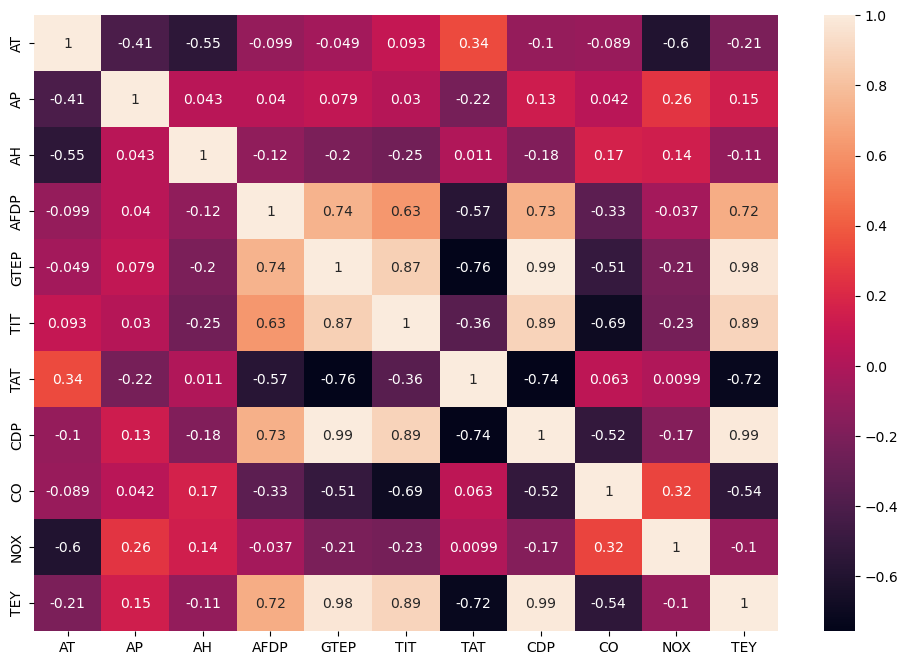

In [11]:
corr=data.corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

## correlation between CDP and GTEP are highly positively correlated
## correlation between CDP and TIT are highly positively correlated
## due to relationship btw predictor variables it causes the multicollinearity 

Text(0.5, 1.0, 'Correlation with Turbine energy yield')

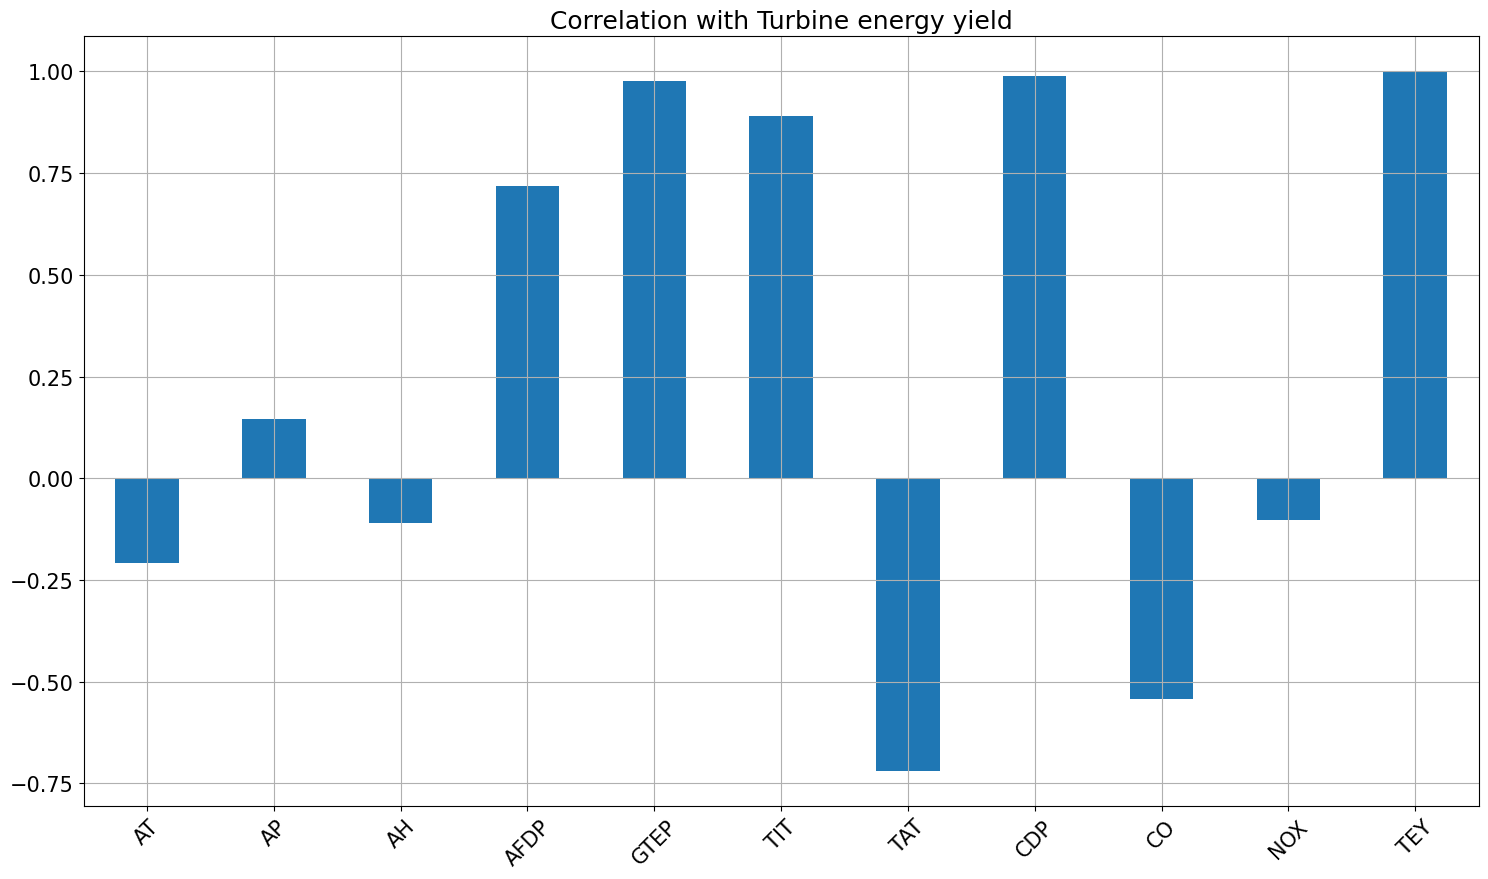

In [12]:
corr=data.corrwith(data['TEY'])
positive_corr=corr[corr>0].sort_values(ascending=False)
negative_corr=corr[corr<0].sort_values(ascending=False)
fig,corr.plot.bar(figsize=(18,10),rot = 45, grid = True,fontsize=15)
plt.title('Correlation with Turbine energy yield',fontsize=18)

# Features such AFDP,GTEP,TIT,CDP are highly positively correlated with Response variable
# Features TAT and CO are moderately negatively correlated with Response variable

# SKEWNESS & KURTOSIS

In [13]:
df=pd.DataFrame(data=[data.skew(),data.kurtosis()],index=['Skewness','kurtosis'])
df=df.T
df

Skewness   kurtosis
AT   -0.030710  -0.987597
AP    0.107601   0.424070
AH   -0.681224  -0.282476
AFDP  0.315150   0.281642
GTEP  0.370987  -0.618358
TIT  -1.133744   0.375232
TAT  -1.485524   0.847637
CDP   0.263042  -0.589420
CO    6.534577  82.518116
NOX   1.126605   2.660381
TEY   0.145963  -0.487058

In [14]:
df['skew']=df['Skewness'].apply(lambda x: 'Positive skew' if x>0 else 'Negative skew')

In [15]:
def kurt(i):
    if i==3:
        return 'Mesokurtic'
    elif i>3:
        return 'Leptokurtic'
    else :
         return 'Platykurtic'

In [16]:
df['kurt']=df['kurtosis'].map(kurt)
df

Skewness   kurtosis           skew         kurt
AT   -0.030710  -0.987597  Negative skew  Platykurtic
AP    0.107601   0.424070  Positive skew  Platykurtic
AH   -0.681224  -0.282476  Negative skew  Platykurtic
AFDP  0.315150   0.281642  Positive skew  Platykurtic
GTEP  0.370987  -0.618358  Positive skew  Platykurtic
TIT  -1.133744   0.375232  Negative skew  Platykurtic
TAT  -1.485524   0.847637  Negative skew  Platykurtic
CDP   0.263042  -0.589420  Positive skew  Platykurtic
CO    6.534577  82.518116  Positive skew  Leptokurtic
NOX   1.126605   2.660381  Positive skew  Platykurtic
TEY   0.145963  -0.487058  Positive skew  Platykurtic

# Feature scaling

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [209]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [242]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Building the model using ANN

In [50]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [124]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [125]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

In [128]:
tuner.search(x_train,y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 05m 16s]
val_mean_absolute_error: 0.5133962333202362

Best val_mean_absolute_error So Far: 0.37412014603614807
Total elapsed time: 00h 25m 39s
INFO:tensorflow:Oracle triggered exit


In [129]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 13
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 64
units_4: 32
units_5: 64
units_6: 32
units_7: 64
units_8: 32
units_9: 32
units_10: 64
units_11: 32
units_12: 96
Score: 0.37412014603614807
Trial summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 32
units_4: 64
units_5: 64
units_6: 96
units_7: 32
units_8: 64
units_9: 64
units_10: 64
units_11: 96
units_12: 64
units_13: 64
units_14: 64
Score: 0.3897281885147095
Trial summary
Hyperparameters:
num_layers: 15
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 64
units_7: 32
units_8: 96
units_9: 32
units_10: 32
units_11: 32
units_12: 96
units_13: 32
units_14: 32
Score: 0.39896781245867413
Trial summary
Hyperparameters:
num_layers: 13
units_0: 96
units_1: 64
learning_rate: 0.01
units_2: 32
units_3: 32
units_4

# num_layers: 13
# units_0: 64
# units_1: 96
# units_2: 32
# units_3: 64
# units_4: 32
# units_5: 64
# units_6: 32
# units_7: 64
# units_8: 32
# units_9: 32
# units_10: 64
# units_11: 32
# units_12: 96
# learning_rate: 0.001

# [Hypertuning to find batchsize and epochs]

In [32]:
def create_model():
    model1=Sequential()
    model1.add(Dense(64,input_dim=10,activation='relu'))
    model1.add(Dense(96,activation='relu'))
    model1.add(Dense(32,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation='relu'))
    model1.add(Dense(96,activation='relu'))
    model1.add(Dense(1,activation='linear'))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1
    

In [26]:
from sklearn.model_selection import GridSearchCV,KFold

In [34]:
model1=KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,30,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10,error_score='raise')

In [35]:
grid_result=grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.772 total time=  17.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-3.749 total time=  15.6s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.534 total time=  18.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-1.313 total time=  34.2s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.903 total time=  16.7s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=30, epochs=100;, score=-1.759 total time=  59.5s
[CV 2/5; 11/16] START batch_size=30, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=30, epochs=100;, score=-0.526 total time=  55.2s
[CV 3/5; 11/16] START batch_size=30, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=30, epochs=100;, score=-0.844 total time=  55.1s
[CV 4/5; 11/16] START batch_size=30, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=30, epochs=100;, score=-0.461 total time=  53.9s
[CV 5/5; 11/16] START batch_size=30, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=30, epochs=100;, score=-0.423 total time=  56.3s
[CV 1/5; 12/16] START batch_size=30, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=30, epochs=200;, score=-1.038 total time= 2.2min
[CV 2/5; 12/16] START batch_size=30, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [36]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.5535882472991943, using {'batch_size': 10, 'epochs': 200}
-1.8542105555534363,1.214271251971082 with {'batch_size': 10, 'epochs': 10}
-0.7380081176757812,0.23362426206176257 with {'batch_size': 10, 'epochs': 50}
-0.7061740756034851,0.3874636431577163 with {'batch_size': 10, 'epochs': 100}
-0.5535882472991943,0.2051738775956649 with {'batch_size': 10, 'epochs': 200}
-1.0253426909446717,0.31483534841775784 with {'batch_size': 20, 'epochs': 10}
-0.8327592194080353,0.2501390417561724 with {'batch_size': 20, 'epochs': 50}
-1.0577990651130675,0.6091131014545975 with {'batch_size': 20, 'epochs': 100}
-0.6806974470615387,0.2118842720355233 with {'batch_size': 20, 'epochs': 200}
-1.0914547562599182,0.14067171036354661 with {'batch_size': 30, 'epochs': 10}
-1.277963674068451,0.8211455228895297 with {'batch_size': 30, 'epochs': 50}
-0.8026379108428955,0.5006290622991562 with {'batch_size': 30, 'epochs': 100}
-0.9348718822002411,0.4671425735917172 with {'batch_size': 30, 'epochs': 200}
-2.

# 'batch_size': 10 &'epochs': 200
# hypertuning to find best dropout_rate

In [27]:
def create_model1(dropout_rate):
    model2=Sequential()
    model2.add(Dense(64,input_dim=10,activation='relu'))
    model2.add(Dense(96,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation='relu'))
    model2.add(Dense(96,activation='relu'))
    model2.add(Dense(1,activation='linear'))
    
    adam=Adam(learning_rate=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [28]:
model2=KerasRegressor(build_fn=create_model1,batch_size=10,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [29]:
grid_result2=grid2.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.546 total time= 7.3min
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.584 total time= 8.5min
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.404 total time= 8.8min
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.864 total time= 8.4min
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.535 total time= 8.4min
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [31]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.561739307641983, using {'dropout_rate': 0.2}
-0.5865115702152253,0.15131218734553106 with {'dropout_rate': 0.0}
-0.737862354516983,0.4951158447387539 with {'dropout_rate': 0.1}
-0.561739307641983,0.21515548358503753 with {'dropout_rate': 0.2}
-0.8077115178108215,0.3640210380666532 with {'dropout_rate': 0.3}
-0.8083563983440399,0.18472802706979152 with {'dropout_rate': 0.4}
-0.6853969395160675,0.21769528897277887 with {'dropout_rate': 0.5}


# Dropout rate=0.2

# Hypertuning for Activation function,initializer

In [24]:
def create_model3(activation_function,init):
    model3=Sequential()
    model3.add(Dense(64,input_dim=10,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(96,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(64,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(64,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(64,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(64,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(96,activation=activation_function,kernel_initializer = init))
    model3.add(Dropout(0.2))
    model3.add(Dense(1,activation='linear'))
    
    adam=Adam(learning_rate=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [27]:
model3=KerasRegressor(build_fn=create_model3,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [28]:
grid_result3=grid3.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-46.746 total time= 4.9min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-47.126 total time= 4.8min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-47.467 total time= 5.0min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-47.996 total time= 4.9min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-47.135 total time= 4.9min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform....

In [29]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -2.1956610918045043, using {'activation_function': 'tanh', 'init': 'normal'}
-47.29390258789063,0.4188135946044328 with {'activation_function': 'softmax', 'init': 'normal'}
-47.302040100097656,0.4036400119404333 with {'activation_function': 'softmax', 'init': 'uniform'}
-47.26805114746094,0.4070883609529743 with {'activation_function': 'softmax', 'init': 'zero'}
-2.1956610918045043,0.3540645154728661 with {'activation_function': 'tanh', 'init': 'normal'}
-2.2410638332366943,0.38540542658295046 with {'activation_function': 'tanh', 'init': 'uniform'}
-11.163788223266602,0.24952442029796623 with {'activation_function': 'tanh', 'init': 'zero'}
-2.243530440330505,0.5313212284060229 with {'activation_function': 'relu', 'init': 'normal'}
-2.421957492828369,0.7986511940365203 with {'activation_function': 'relu', 'init': 'uniform'}
-91.85370178222657,0.4199366900580747 with {'activation_function': 'relu', 'init': 'zero'}


In [ ]:
# building model using nn
# epochs=200
# batch size=40
# dropout rate=0.2
# activation function=tanh
# initializer=normalb

# Building model using Neural Network

In [289]:
model3=Sequential()
model3.add(Dense(64,input_dim=10,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(96,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(96,activation='tanh',kernel_initializer = 'normal'))
model3.add(Dropout(0.2))
model3.add(Dense(1,kernel_initializer='normal'))
    
adam=Adam(learning_rate=0.001)
model3.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model3.fit(x_train, y_train , batch_size=40, validation_split=0.3, epochs=200,  verbose=1)

Epoch 1/200
185/185 [==============================] - 3s 6ms/step - loss: 15071.2822 - mae: 121.5126 - mse: 15071.2822 - val_loss: 12408.5010 - val_mae: 110.2814 - val_mse: 12408.5010
Epoch 2/200
185/185 [==============================] - 1s 5ms/step - loss: 10622.8018 - mae: 101.7102 - mse: 10622.8018 - val_loss: 8901.6846 - val_mae: 93.0332 - val_mse: 8901.6846
Epoch 3/200
185/185 [==============================] - 1s 5ms/step - loss: 7572.8511 - mae: 85.3997 - mse: 7572.8511 - val_loss: 6289.1694 - val_mae: 77.7345 - val_mse: 6289.1694
Epoch 4/200
185/185 [==============================] - 1s 5ms/step - loss: 5320.9810 - mae: 71.0285 - mse: 5320.9814 - val_loss: 4345.3921 - val_mae: 64.0225 - val_mse: 4345.3921
Epoch 5/200
185/185 [==============================] - 1s 4ms/step - loss: 3641.8770 - mae: 57.9730 - mse: 3641.8767 - val_loss: 2932.4229 - val_mae: 51.8258 - val_mse: 2932.4229
Epoch 6/200
185/185 [==============================] - 1s 5ms/step - loss: 2441.7856 - mae: 46.5

185/185 [==============================] - 1s 5ms/step - loss: 300.2933 - mae: 13.5687 - mse: 300.2933 - val_loss: 246.6197 - val_mae: 10.9648 - val_mse: 246.6197
Epoch 94/200
185/185 [==============================] - 1s 4ms/step - loss: 296.6760 - mae: 13.5522 - mse: 296.6760 - val_loss: 246.5389 - val_mae: 11.0347 - val_mse: 246.5389
Epoch 95/200
185/185 [==============================] - 1s 5ms/step - loss: 294.5094 - mae: 13.4510 - mse: 294.5094 - val_loss: 246.5835 - val_mae: 10.9700 - val_mse: 246.5835
Epoch 96/200
185/185 [==============================] - 1s 5ms/step - loss: 297.0703 - mae: 13.5252 - mse: 297.0703 - val_loss: 246.5901 - val_mae: 10.9689 - val_mse: 246.5901
Epoch 97/200
185/185 [==============================] - 1s 5ms/step - loss: 296.8515 - mae: 13.5505 - mse: 296.8515 - val_loss: 246.5244 - val_mae: 10.9894 - val_mse: 246.5244
Epoch 98/200
185/185 [==============================] - 1s 6ms/step - loss: 294.5782 - mae: 13.4797 - mse: 294.5782 - val_loss: 246.6

Epoch 141/200
185/185 [==============================] - 1s 5ms/step - loss: 62.8423 - mae: 6.2586 - mse: 62.8423 - val_loss: 5.6807 - val_mae: 1.5542 - val_mse: 5.6807
Epoch 142/200
185/185 [==============================] - 1s 5ms/step - loss: 63.3797 - mae: 6.2760 - mse: 63.3797 - val_loss: 8.0284 - val_mae: 2.2488 - val_mse: 8.0284
Epoch 143/200
185/185 [==============================] - 1s 5ms/step - loss: 62.7369 - mae: 6.2747 - mse: 62.7369 - val_loss: 5.4581 - val_mae: 1.6517 - val_mse: 5.4581
Epoch 144/200
185/185 [==============================] - 1s 5ms/step - loss: 63.5182 - mae: 6.3171 - mse: 63.5182 - val_loss: 6.3662 - val_mae: 1.9349 - val_mse: 6.3662
Epoch 145/200
185/185 [==============================] - 1s 5ms/step - loss: 65.4092 - mae: 6.3552 - mse: 65.4092 - val_loss: 21.0475 - val_mae: 3.9506 - val_mse: 21.0475
Epoch 146/200
185/185 [==============================] - 1s 4ms/step - loss: 63.5969 - mae: 6.3526 - mse: 63.5969 - val_loss: 7.3021 - val_mae: 2.1560 - 

In [290]:
y_pred=model3.predict(x_test)
y_pred

141/141 [==============================] - 0s 2ms/step


array([[134.60481],
       [112.28352],
       [134.59216],
       ...,
       [157.27113],
       [134.4486 ],
       [157.48674]], dtype=float32)

In [296]:
df=pd.DataFrame(y_pred,columns=['Prediction'])
df['Actual']=y_test.values
df['Error']=(df['Actual'] - df['Prediction'])/(df['Actual'])
df

Prediction  Actual     Error
0     134.604813  134.46 -0.001077
1     112.283524  111.88 -0.003607
2     134.592163  133.72 -0.006522
3     133.492111  133.79  0.002227
4     111.621063  110.77 -0.007683
...          ...     ...       ...
4507  138.467575  134.08 -0.032724
4508  109.683571  102.87 -0.066235
4509  157.271133  155.96 -0.008407
4510  134.448593  133.67 -0.005825
4511  157.486740  156.32 -0.007464

[4512 rows x 3 columns]

<AxesSubplot:xlabel='Actual', ylabel='Prediction'>

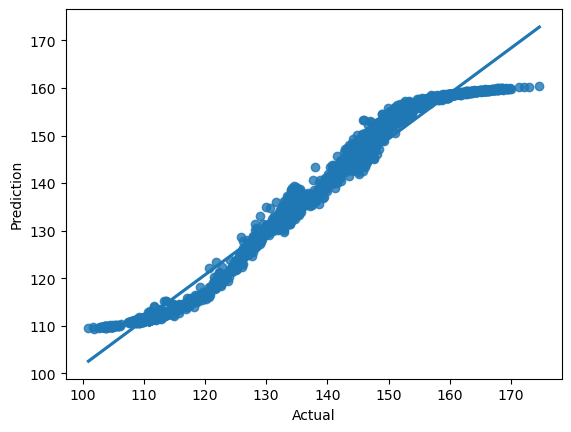

In [319]:
sns.regplot(df.Actual,df.Prediction )

<AxesSubplot:xlabel='Error', ylabel='Density'>

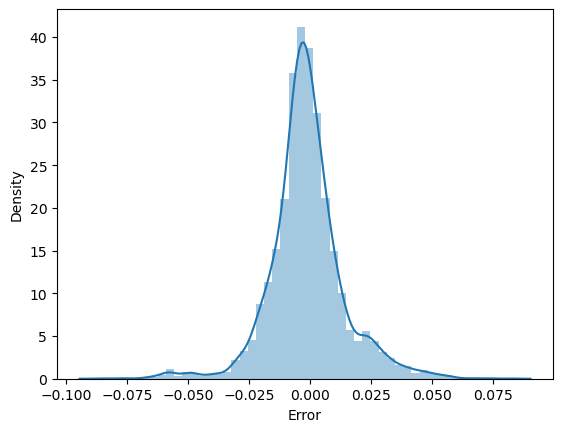

In [299]:
sns.distplot(df.Error)

# Errors are approxiamtely normal distributed

In [308]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.4675767798457588
MSE: 4.622800541562823
RMSE: 2.1500698922506736


In [312]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model3.predict(x_test)
y_predict_train = model3.predict(x_train) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

329/329 [==============================] - 1s 1ms/step
R2_score (train):  0.9810418503631304
R2_score (test):  0.9816799327329485


In [315]:
df.head(25)

Prediction  Actual     Error
0   134.604813  134.46 -0.001077
1   112.283524  111.88 -0.003607
2   134.592163  133.72 -0.006522
3   133.492111  133.79  0.002227
4   111.621063  110.77 -0.007683
5   115.160416  113.32 -0.016241
6   133.696869  133.77  0.000547
7   129.348984  128.98 -0.002861
8   158.608017  159.42  0.005093
9   158.467499  161.86  0.020959
10  129.511353  129.84  0.002531
11  133.314651  133.45  0.001014
12  135.182449  134.21 -0.007246
13  111.313324  110.80 -0.004633
14  111.857193  111.02 -0.007541
15  132.472061  133.83  0.010147
16  157.093430  154.68 -0.015603
17  111.556885  110.77 -0.007104
18  111.840134  111.01 -0.007478
19  134.270279  133.69 -0.004340
20  134.187042  134.79  0.004473
21  159.028412  163.43  0.026933
22  122.077606  120.71 -0.011330
23  112.048820  111.79 -0.002315
24  134.565567  133.65 -0.006850

# Feature selection

In [19]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [26]:
test=SelectKBest(score_func=mutual_info_regression)
fit=test.fit(x,y)
fit.transform(x)

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [39]:
feature=pd.DataFrame(fit.scores_,columns=['Scores'])
feature['x_col']=x.columns

<AxesSubplot:xlabel='x_col', ylabel='Scores'>

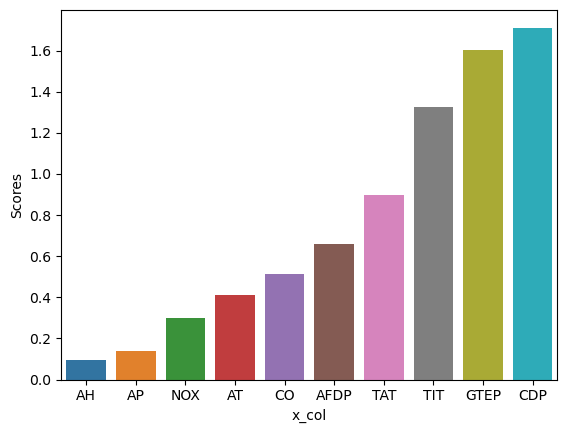

In [41]:
sns.barplot(x=feature['x_col'],y=feature['Scores'],data=feature,order=feature.sort_values('Scores').x_col)

In [43]:
x1=x.drop(columns=['AH','AP','NOX'],axis=1)

AT    AFDP    GTEP     TIT     TAT     CDP      CO
0      6.8594  3.5000  19.663  1059.2  550.00  10.605  3.1547
1      6.7850  3.4998  19.728  1059.3  550.00  10.598  3.2363
2      6.8977  3.4824  19.779  1059.4  549.87  10.601  3.2012
3      7.0569  3.4805  19.792  1059.6  549.99  10.606  3.1923
4      7.3978  3.4976  19.765  1059.7  549.98  10.612  3.2484
...       ...     ...     ...     ...     ...     ...     ...
15034  9.0301  3.5421  19.164  1049.7  546.21  10.400  4.5186
15035  7.8879  3.5059  19.414  1046.3  543.22  10.433  4.8470
15036  7.2647  3.4770  19.530  1037.7  537.32  10.483  7.9632
15037  7.0060  3.4486  19.377  1043.2  541.24  10.533  6.2494
15038  6.9279  3.4275  19.306  1049.9  545.85  10.583  4.9816

[15039 rows x 7 columns]

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
scaler=StandardScaler()
X1=scaler.fit_transform(x1)

array([[-1.4397781 , -0.92123188, -1.37910125, ...,  0.58524028,
        -1.35733078,  0.53201195],
       [-1.44960109, -0.92149498, -1.36352783, ...,  0.58524028,
        -1.36367619,  0.56873344],
       [-1.43472138, -0.94438456, -1.35130868, ...,  0.56871459,
        -1.36095673,  0.5529378 ],
       ...,
       [-1.38626659, -0.95148822, -1.41096688, ..., -1.02664984,
        -1.46792219,  2.69592467],
       [-1.42042259, -0.98884822, -1.44762432, ..., -0.52833681,
        -1.42259784,  1.9246834 ],
       [-1.43073409, -1.01660512, -1.46463529, ...,  0.05768949,
        -1.37727349,  1.35415028]])

In [48]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.3,random_state=42)

# model building using neural network

In [52]:
model4=Sequential()
model4.add(Dense(64,input_dim=7,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(96,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(96,activation='tanh',kernel_initializer = 'normal'))
model4.add(Dropout(0.2))
model4.add(Dense(1,kernel_initializer='normal'))
    
adam=Adam(learning_rate=0.001)
model4.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model4.fit(x1_train, y1_train , batch_size=40, validation_split=0.3, epochs=200,  verbose=1)

Epoch 1/200
185/185 [==============================] - 3s 5ms/step - loss: 15025.7266 - mae: 121.3190 - mse: 15025.7266 - val_loss: 12364.8486 - val_mae: 110.0833 - val_mse: 12364.8486
Epoch 2/200
185/185 [==============================] - 1s 4ms/step - loss: 10579.6104 - mae: 101.5112 - mse: 10579.6104 - val_loss: 8867.2432 - val_mae: 92.8479 - val_mse: 8867.2432
Epoch 3/200
185/185 [==============================] - 1s 4ms/step - loss: 7559.8452 - mae: 85.3136 - mse: 7559.8452 - val_loss: 6262.7900 - val_mae: 77.5646 - val_mse: 6262.7900
Epoch 4/200
185/185 [==============================] - 1s 4ms/step - loss: 5291.8960 - mae: 70.7955 - mse: 5291.8960 - val_loss: 4327.1055 - val_mae: 63.8795 - val_mse: 4327.1055
Epoch 5/200
185/185 [==============================] - 1s 4ms/step - loss: 3626.9592 - mae: 57.8730 - mse: 3626.9592 - val_loss: 2917.5220 - val_mae: 51.6818 - val_mse: 2917.5220
Epoch 6/200
185/185 [==============================] - 1s 4ms/step - loss: 2438.1887 - mae: 46.4

185/185 [==============================] - 1s 4ms/step - loss: 300.5435 - mae: 13.6255 - mse: 300.5435 - val_loss: 246.5153 - val_mae: 11.0034 - val_mse: 246.5153
Epoch 94/200
185/185 [==============================] - 1s 5ms/step - loss: 298.8945 - mae: 13.5498 - mse: 298.8945 - val_loss: 246.5679 - val_mae: 10.9731 - val_mse: 246.5679
Epoch 95/200
185/185 [==============================] - 1s 5ms/step - loss: 294.0327 - mae: 13.4650 - mse: 294.0327 - val_loss: 246.5706 - val_mae: 10.9725 - val_mse: 246.5706
Epoch 96/200
185/185 [==============================] - 1s 5ms/step - loss: 297.7555 - mae: 13.5922 - mse: 297.7555 - val_loss: 246.6651 - val_mae: 10.9621 - val_mse: 246.6651
Epoch 97/200
185/185 [==============================] - 1s 5ms/step - loss: 297.0877 - mae: 13.5827 - mse: 297.0877 - val_loss: 246.5824 - val_mae: 10.9702 - val_mse: 246.5824
Epoch 98/200
185/185 [==============================] - 1s 5ms/step - loss: 294.4679 - mae: 13.5874 - mse: 294.4679 - val_loss: 246.5

Epoch 141/200
185/185 [==============================] - 1s 4ms/step - loss: 64.4897 - mae: 6.3447 - mse: 64.4897 - val_loss: 5.9484 - val_mae: 1.7934 - val_mse: 5.9484
Epoch 142/200
185/185 [==============================] - 1s 4ms/step - loss: 63.3723 - mae: 6.3042 - mse: 63.3723 - val_loss: 7.2167 - val_mae: 1.9800 - val_mse: 7.2167
Epoch 143/200
185/185 [==============================] - 1s 4ms/step - loss: 64.5084 - mae: 6.3497 - mse: 64.5084 - val_loss: 10.3299 - val_mae: 2.7336 - val_mse: 10.3299
Epoch 144/200
185/185 [==============================] - 1s 4ms/step - loss: 62.8955 - mae: 6.3263 - mse: 62.8955 - val_loss: 5.9926 - val_mae: 1.9132 - val_mse: 5.9926
Epoch 145/200
185/185 [==============================] - 1s 4ms/step - loss: 63.1296 - mae: 6.3017 - mse: 63.1296 - val_loss: 4.3882 - val_mae: 1.3948 - val_mse: 4.3882
Epoch 146/200
185/185 [==============================] - 1s 4ms/step - loss: 63.0087 - mae: 6.2611 - mse: 63.0087 - val_loss: 6.6509 - val_mae: 1.8166 - 

In [53]:
y_pred=model4.predict(x1_test)
y_pred

141/141 [==============================] - 0s 1ms/step


array([[134.49367 ],
       [110.862236],
       [133.42825 ],
       ...,
       [156.73634 ],
       [132.34138 ],
       [157.49289 ]], dtype=float32)

In [54]:
df=pd.DataFrame(y_pred,columns=['Prediction'])
df['Actual']=y1_test.values
df['Error']=(df['Actual'] - df['Prediction'])/(df['Actual'])
df

Prediction  Actual     Error
0     134.493668  134.46 -0.000250
1     110.862236  111.88  0.009097
2     133.428253  133.72  0.002182
3     133.362930  133.79  0.003192
4     110.172623  110.77  0.005393
...          ...     ...       ...
4507  139.369095  134.08 -0.039447
4508  107.266869  102.87 -0.042742
4509  156.736343  155.96 -0.004978
4510  132.341385  133.67  0.009940
4511  157.492889  156.32 -0.007503

[4512 rows x 3 columns]

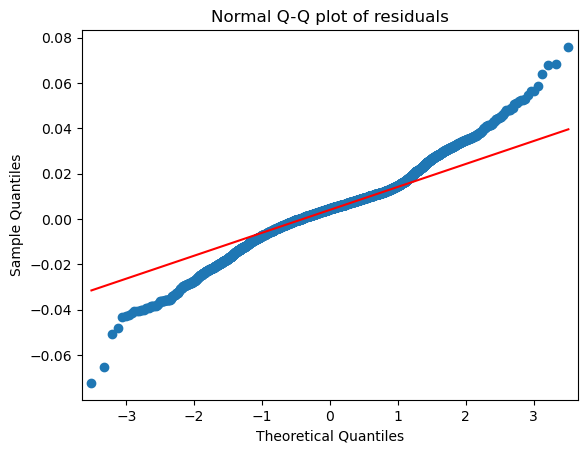

In [57]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# dataset with “fat tails,” meaning that compared to the normal distribution there is more data located at the extremes of the distribution and less data in the center of the distribution

<AxesSubplot:xlabel='Error', ylabel='Density'>

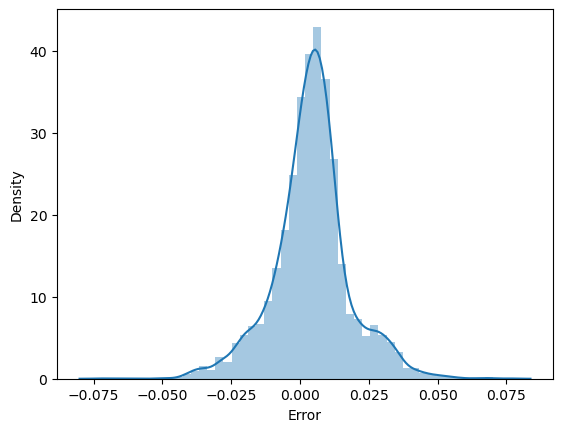

In [58]:
sns.distplot(df['Error'])

# Error is normally distributed

In [59]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y1_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y1_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test,y_pred)))

MAE: 1.4685737676823394
MSE: 4.132711678101403
RMSE: 2.0329071985955


# By interpreting MAE we can say that average absolue error between actual and predicted values are 1.46

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model4.predict(x1_test)
y_predict_train = model4.predict(x1_train) 
print('R2_score (train): ',r2_score(y1_train, y_predict_train))
print('R2_score (test): ',r2_score(y1_test, y_predict_test))

329/329 [==============================] - 0s 1ms/step
R2_score (train):  0.9830385219287742
R2_score (test):  0.9836221452218331


In [65]:
df1=df.iloc[:,[1,0,2]]
df1.head(20)

Actual  Prediction     Error
0   134.46  134.493668 -0.000250
1   111.88  110.862236  0.009097
2   133.72  133.428253  0.002182
3   133.79  133.362930  0.003192
4   110.77  110.172623  0.005393
5   113.32  114.217346 -0.007919
6   133.77  132.321594  0.010828
7   128.98  126.622421  0.018279
8   159.42  159.262207  0.000990
9   161.86  158.647476  0.019848
10  129.84  127.525505  0.017826
11  133.45  133.083710  0.002745
12  134.21  133.613480  0.004445
13  110.80  110.229485  0.005149
14  111.02  110.547188  0.004259
15  133.83  133.245529  0.004367
16  154.68  156.686172 -0.012970
17  110.77  110.009804  0.006863
18  111.01  110.317703  0.006236
19  133.69  132.320282  0.010245